# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

df = pd.read_csv("Scorecard.csv")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44536 entries, 0 to 44535
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   INSTNM             44536 non-null  object
 1   STABBR             44536 non-null  object
 2   year               44536 non-null  int64 
 3   earnings_med       44536 non-null  int64 
 4   count_not_working  44536 non-null  int64 
 5   count_working      44536 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.0+ MB
None


In [35]:
df.dropna()

,INSTNM,STABBR,year,earnings_med,count_not_working,count_working
0,Alabama A & M University,AL,2007,36600,116,1139
1,University of Alabama at Birmingham,AL,2007,40800,366,2636
2,Amridge University,AL,2007,0,6,25
3,University of Alabama in Huntsville,AL,2007,49300,122,975
4,Alabama State University,AL,2007,30500,210,1577
...,...,...,...,...,...,...
44531,Massasoit Community College,MA,2016,0,0,0
44532,Merrimack College,MA,2016,0,0,0
44533,MGH Institute of Health Professions,MA,2016,0,0,0
44534,Middlesex Community College,MA,2016,0,0,0


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

C:\Users\Julie\AppData\Local\Temp\ipykernel_4632\3826780951.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), cmap="Reds", annot = True)


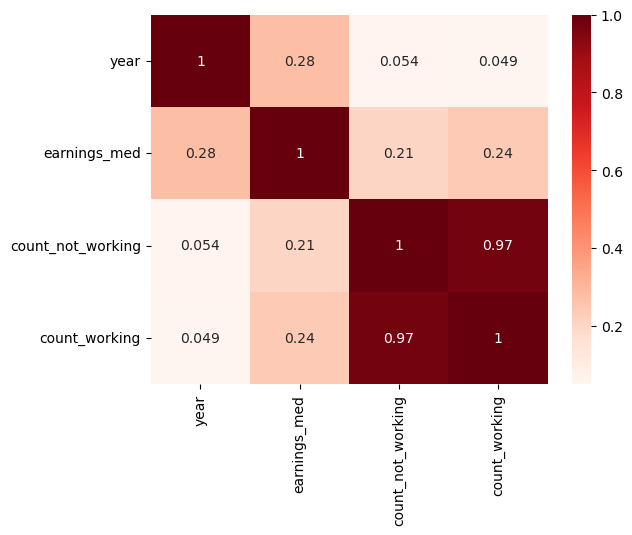

In [36]:
sb.heatmap(df.corr(), cmap="Reds", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [37]:
#count_working
#count_not_working

x = df['count_not_working']
y = df['count_working']


x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

x_train_sm = sm.add_constant(x_train)

lr = sm.OLS(y_train, x_train_sm).fit()

lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          count_working   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 5.366e+05
Date:                Wed, 18 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:30:46   Log-Likelihood:            -2.7200e+05
No. Observations:               31175   AIC:                         5.440e+05
Df Residuals:                   31173   BIC:                         5.440e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -87.5872      8.721    -10.043      0.000    -104.681     -70.494
count_not_working     6.0946      0.008    732.515      0.000       6.078       6.111
==============================================================================
Omnibus:                    34026.529   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22945613.092
Skew:                          -4.803   Prob(JB):                         0.00
Kurtosis:                     135.561   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

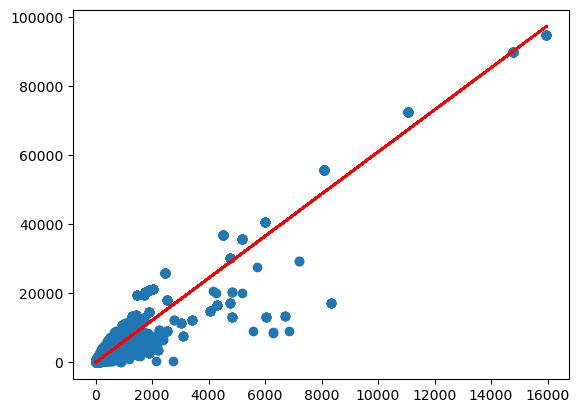

In [31]:
plt.scatter(x_train, y_train)
plt.plot(x_train, -87.5872 + 6.0946*x_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

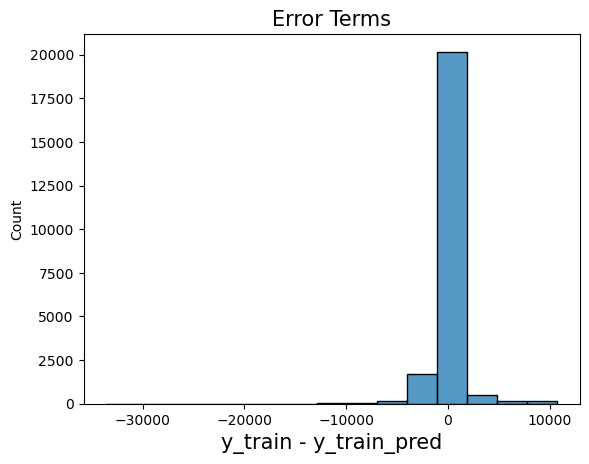

In [32]:
y_train_pred = lr.predict(x_train_sm)

res = (y_train - y_train_pred)

fig = plt.figure()
sb.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.945
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? No, it was not effective for this particular model.
3. Was your plot of the error terms a bell curve? Not really, because 0 is the value used to fill in the missing Null values.